In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, InputLayer, Conv2D, MaxPooling2D, Flatten, Reshape, UpSampling2D

2024-10-22 09:00:32.973059: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 09:00:33.172705: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 09:00:33.974973: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-22 09:00:36.897228: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

In [4]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [7]:
autoencoder = Sequential()

# Codificador
autoencoder.add(InputLayer(shape=(28,28,1)))
autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=((2, 2))))

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=((2, 2)), padding='same'))

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', strides=(2,2)))
autoencoder.add(Flatten())

# Decodificador
autoencoder.add(Reshape((4, 4, 8)))
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2, 2)))
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2, 2)))
autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2, 2)))
autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, validation_data=(X_test, X_test))

2024-10-22 09:00:42.177772: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


2024-10-22 09:00:42.872889: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 78s 311ms/step - accuracy: 0.7746 - loss: 0.4056 - val_accuracy: 0.7976 - val_loss: 0.1545
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 78s 331ms/step - accuracy: 0.8011 - loss: 0.1473 - val_accuracy: 0.8067 - val_loss: 0.1309
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 68s 271ms/step - accuracy: 0.8065 - loss: 0.1282 - val_accuracy: 0.8066 - val_loss: 0.1194
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 246ms/step - accuracy: 0.8088 - loss: 0.1190 - val_accuracy: 0.8092 - val_loss: 0.1132
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 55s 235ms/step - accuracy: 0.8098 - loss: 0.1136 - val_accuracy: 0.8091 - val_loss: 0.1090
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 75s 205ms/step - accuracy: 0.8104 - loss: 0.1093 - val_accuracy: 0.8099 - val_loss: 0.1059
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 47s 201ms/step - accuracy: 0.8111 - loss: 0.1065 - val_accuracy: 0.8105 - val_loss: 0.1036
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 196ms/step - accuracy: 0.8113 - loss: 0.1042 - val

In [10]:
encoder = Model(inputs=autoencoder.get_layer('conv2d').input, 
                outputs=autoencoder.get_layer('flatten').output)

encoder.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
codified_images = encoder.predict(X_test)
codified_images.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


(10000, 128)

In [13]:
decodified_images = autoencoder.predict(X_test)
decodified_images.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step


(10000, 28, 28, 1)

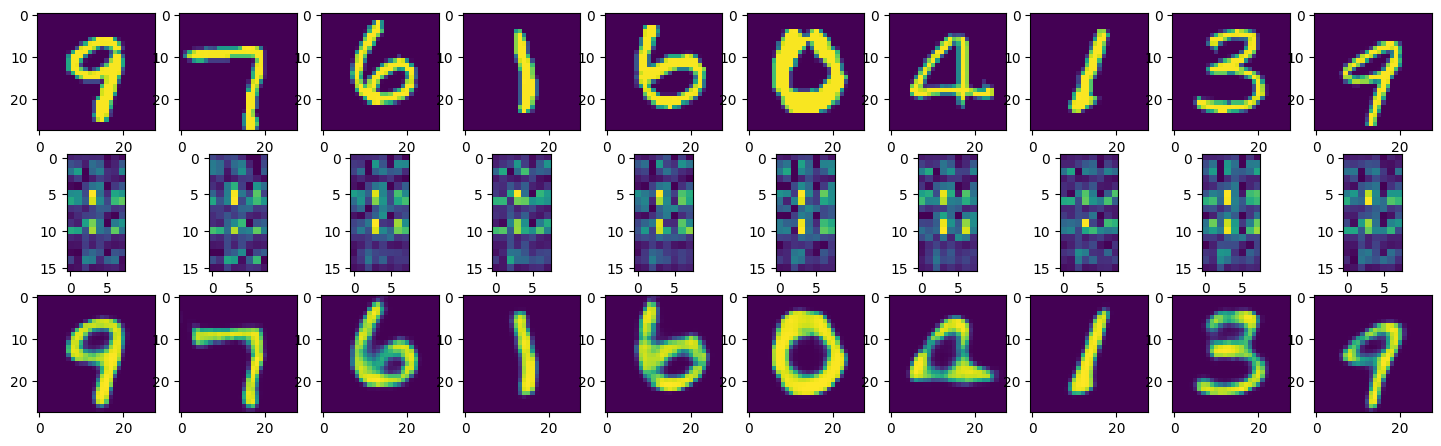

In [16]:
images_num = 10
test_images = np.random.randint(X_test.shape[0], size=images_num)
plt.figure(figsize=(18, 18))

for i, image_idx in enumerate(test_images):
    #Imagem Orginal
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    plt.xticks()
    plt.yticks()
    
    #Imagem Codificada
    eixo = plt.subplot(10, 10, i + 1 + images_num)
    plt.imshow(codified_images[image_idx].reshape(16, 8))
    plt.xticks()
    plt.yticks()
    
    #Imagem Orginal
    eixo = plt.subplot(10, 10, i + 1 + images_num * 2)
    plt.imshow(decodified_images[image_idx].reshape(28, 28))
    plt.xticks()
    plt.yticks()